# Bayesian exploration using script

In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

from xopt.algorithms.functional import run_algortihm
from xopt.generators.bayesian.generator import BayesianExploration

# test function
from xopt.tests.test_functions import TNK

In [2]:
# To see log messages
from xopt import output_notebook
output_notebook()

In [3]:
# Get VOCS
vocs = TNK.VOCS
print(vocs)

# technically this is not necessary, but its good to be explict
vocs['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = TNK.evaluate_TNK

n_steps = 30


if SMOKE_TEST:
    generator_options = {'batch_size': 1,
                           'num_restarts': 2,
                           'raw_samples': 2}
    n_steps = 3

# create generator object
generator = BayesianExploration(vocs, n_steps)

# Run - see comments for example options
alg = run_algortihm(vocs, generator, function=EVALUATE,
                    n_initial_samples=5)

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}}
Generating and submitting initial samples
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samp

Index(['x1', 'x2', 'a', 'y1', 'y2', 'c1', 'c2', 'some_array', 'status', 'x1_t',
       'x2_t', 'y1_t', 'c1_t', 'c2_t', 'c1_f', 'c2_f', 'feasibility'],
      dtype='object')
          x1        x2
0   1.858958  0.786257
1   0.564454  0.528056
2   3.075988  0.168020
3   0.983823  1.500813
4   2.479897  1.248416
5   0.000000  1.839951
6   1.135871  0.000000
7   0.963906  1.091141
8   0.599314  0.624540
9   0.819403  0.891652
10  0.839831  0.920995
11  0.520434  0.381564
12  0.906055  0.869391
13  0.969210  0.807849
14  1.050571  0.629710
15  1.061515  0.441121
16  1.083695  0.398855
17  0.682236  0.971404
18  0.511833  0.932977
19  0.410542  0.988943
20  0.372252  1.058540
21  0.311404  1.064783
22  1.180090  0.660748
23  0.612417  1.146427
24  0.249505  1.056937
25  0.105477  0.993381
26  1.099218  0.325520
27  1.110041  0.825021
28  0.607960  1.162401
29  0.000000  0.000000
30  1.072558  0.236048
31  0.134369  1.031119
32  1.032803  0.175289
33  1.192287  0.491383
34  1.005334  0.139095

Text(0, 0.5, '$x_2$')

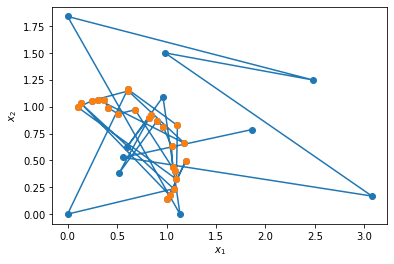

In [8]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
results = alg.data
print(results.keys())
variables = results[vocs['variables']]
print(variables)
valid = results[vocs['variables']][results['feasibility']]
ax.plot(variables['x1'], variables['x2'], '-o')
ax.plot(valid['x1'], valid['x2'], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

### Bayesian exploration with proximal biasing
- should result in a smoother path through input space

In [9]:
# create generator object
generator = BayesianExploration(vocs, n_steps, sigma=[0.1, 0.1])

# Run - see comments for example options
alg = run_algortihm(vocs, generator, function=EVALUATE,
                    n_initial_samples=5)

Generating and submitting initial samples
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generating samples
collecting results
generati

Index(['x1', 'x2', 'a', 'y1', 'y2', 'c1', 'c2', 'some_array', 'status', 'x1_t',
       'x2_t', 'y1_t', 'c1_t', 'c2_t', 'c1_f', 'c2_f', 'feasibility'],
      dtype='object')
          x1        x2
0   1.055823  2.598387
1   0.599241  1.252639
2   1.275252  2.917935
3   0.070104  1.652696
4   2.999007  0.859547
5   2.248996  0.689060
6   1.451573  0.558582
7   1.178130  0.391125
8   0.952549  0.334234
9   1.071197  0.132286
10  1.019724  0.048558
11  1.030460  0.553639
12  1.059675  0.820899
13  0.847310  0.862617
14  0.909903  1.040543
15  0.756253  1.124773
16  0.631808  1.067415
17  0.564858  0.980735
18  0.522637  0.880578
19  0.549902  0.822094
20  0.649682  0.709035
21  0.845927  0.691626
22  0.969586  0.474693
23  1.140843  0.262078
24  1.183753  0.566412
25  1.160146  0.698599
26  1.056126  0.914889
27  0.783638  0.974663
28  0.547037  1.172411
29  0.374393  1.121991
30  0.217668  1.040532
31  0.082837  0.939602
32  0.231509  1.168812
33  0.141539  1.088261
34  0.132792  0.999677

Text(0, 0.5, '$x_2$')

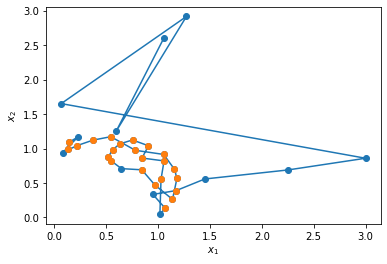

In [10]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
results = alg.data
print(results.keys())
variables = results[vocs['variables']]
print(variables)
valid = results[vocs['variables']][results['feasibility']]
ax.plot(variables['x1'], variables['x2'], '-o')
ax.plot(valid['x1'], valid['x2'], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')